# Linear Modelling

## 2.Logistic Regression
It is a classification alogirithm based on independent variables used to determine descrete values 0 or 1 ,false or True or Yes ,No.

In [11]:
#prdeict a student will pass or not  based on maths,physics,chem maths
import pandas as pd
import numpy as np
df = pd.read_csv("Student.csv")

In [12]:
df.columns

Index(['Maths', 'Physics', 'Chemistry', 'Result'], dtype='object')

In [13]:
df.head(5)

,Maths,Physics,Chemistry,Result
0,17,27,22,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0


In [14]:
label = df["Result"]
df = df.drop('Result',axis=1)
df.sample(2)

,Maths,Physics,Chemistry
734,74,31,56
647,10,82,35


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(df,label)

LogisticRegression()

In [22]:
marks = [10,40,100]
if model.predict([marks])==0:
    print("Fail")
else:
    print("Pass")

Fail


# Ridge  Lasso Regression Implemenattion
cost func = squared_error + lambda(slope)2

1. to avoid overfitting
2. help feature selection

In [3]:
from sklearn.datasets import load_boston

In [5]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = load_boston()

In [12]:
dataset = pd.DataFrame(df.data)
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
dataset.columns = df.feature_names

In [14]:
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [15]:
df.target.shape

(506,)

In [16]:
dataset["Price"]=df.target

In [17]:
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [19]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mse = cross_val_score(model,X,y,scoring="neg_mean_squared_error")
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699055


# Ridge Regression
cost func = squared_error + lambda(slope)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alpha_values = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge,alpha_values,scoring='neg_mean_squared_error')
ridge_regression.fit(X,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 100}
-29.905701947540344


## Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
alpha_values ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(model,alpha_values,scoring='neg_mean_squared_error')
lasso_regression.fit(X,y)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [36]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-35.531580220694856


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
predic_lasso = lasso_regression.predict(X_test)
predic_ridge = ridge_regression.predict(X_test)

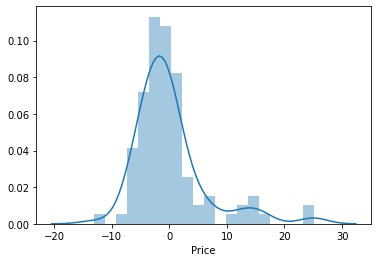

In [42]:
import seaborn as sns
sns.distplot(y_test-predic_lasso)

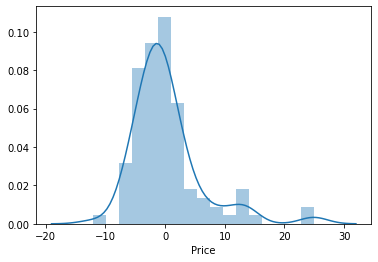

In [43]:
sns.distplot(y_test-predic_ridge)